In [67]:
from itertools import chain
import pyalex
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

# monkey patch pyalex.Work to implement __hash__ (using id)
def custom_hash(self):
    return id(self)


pyalex.Work.__hash__ = custom_hash


def get_referenced_publications(openalex_id: str, require_abstract=False) -> set[pyalex.Work]:
    referenced_publications = set()
    publication = pyalex.Works()[openalex_id]
    reference_ids = set(publication["referenced_works"])
    reference_ids = ["W" + reference.split("W")[-1] for reference in
                     reference_ids]  # use shortened ids because query gets too long otherwise 
    for i in range(0, len(reference_ids), 100):
        query = (
            pyalex.Works()
            .filter(openalex="|".join(reference_ids[i: i + 100]))
        )        
        if require_abstract:
            query = query.filter(has_abstract=True)
            
        for pyalex_work in chain(*query.paginate(per_page=100, n_max=100)):
            if pyalex_work["id"] != "https://openalex.org/W4285719527":  # deleted works are represented by this dummy entity
                referenced_publications.add(pyalex_work)
                
        return referenced_publications

def get_referenced_publications_in_corpus(openalex_ids: list[str]) -> dict[str, set[pyalex.Work]]:
    referenced_publications_in_corpus = {}
    for query_id in openalex_ids:
        referenced_publications_in_corpus[query_id] = get_referenced_publications(query_id)
    return referenced_publications_in_corpus

In [56]:
import pandas as pd
df = pd.read_pickle("eval_common_references_2024-08-11T16:50:38.412734.pkl")

In [57]:
df

,run,type,query_work,result_work,result_rank,common_references,max_common_references,ratio_common_references,is_reference_of_citing_work
0,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W3216146155,1,0,41,0.000000,False
1,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W1995297089,2,0,41,0.000000,True
2,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W3001733563,3,0,41,0.000000,False
3,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W2134582745,4,0,41,0.000000,True
4,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W2138807703,5,1,39,0.025641,True
...,...,...,...,...,...,...,...,...,...
19995,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W3185871335,96,6,15,0.400000,True
19996,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W2762229885,97,1,23,0.043478,True
19997,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W2987037502,98,0,0,NaN,True
19998,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W4223630566,99,0,29,0.000000,True


In [58]:
retrieval = df[df["type"] == "retrieval"]
reranking = df[df["type"] == "reranking"]
retrieval_top10 = retrieval[retrieval["result_rank"] <= 10]
reranking_top10 = reranking[reranking["result_rank"] <= 10]
retrieval_top10

,run,type,query_work,result_work,result_rank,common_references,max_common_references,ratio_common_references,is_reference_of_citing_work
0,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W3216146155,1,0,41,0.000000,False
1,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W1995297089,2,0,41,0.000000,True
2,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W3001733563,3,0,41,0.000000,False
3,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W2134582745,4,0,41,0.000000,True
4,0,retrieval,https://openalex.org/W316998542,https://openalex.org/W2138807703,5,1,39,0.025641,True
...,...,...,...,...,...,...,...,...,...
19805,99,retrieval,https://openalex.org/W4386898729,https://openalex.org/W3113171896,6,1,19,0.052632,False
19806,99,retrieval,https://openalex.org/W4386898729,https://openalex.org/W3176832074,7,7,56,0.125000,False
19807,99,retrieval,https://openalex.org/W4386898729,https://openalex.org/W2793826339,8,1,32,0.031250,True
19808,99,retrieval,https://openalex.org/W4386898729,https://openalex.org/W3138004978,9,1,32,0.031250,False


In [26]:
reranking_top10

,run,type,query_work,result_work,result_rank,common_references,max_common_references,ratio_common_references,is_reference_of_citing_work
100,0,reranking,https://openalex.org/W316998542,https://openalex.org/W2104830066,1,6,41,0.146341,True
101,0,reranking,https://openalex.org/W316998542,https://openalex.org/W2134582745,2,0,41,0.000000,True
102,0,reranking,https://openalex.org/W316998542,https://openalex.org/W2138807703,3,1,39,0.025641,True
103,0,reranking,https://openalex.org/W316998542,https://openalex.org/W1971636989,4,7,41,0.170732,True
104,0,reranking,https://openalex.org/W316998542,https://openalex.org/W2106515248,5,0,0,NaN,True
...,...,...,...,...,...,...,...,...,...
19905,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W3001288491,6,0,0,NaN,True
19906,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W4280565316,7,7,43,0.162791,False
19907,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W3214152447,8,0,0,NaN,True
19908,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W3201110970,9,4,21,0.190476,True


In [29]:
referenced_publications_in_corpus = get_referenced_publications_in_corpus(df["query_work"].unique())

## ratio of retrieved query work references to the total number of query work references in corpus

In [73]:
# ratio of retrieved query work references to the total number of query work references in corpus
def get_ratio_retrieved_references(df: pd.DataFrame) -> NDArray[np.float64]:
    ratio_retrieved_references = []
    num_runs = df["run"].max()
    for i in range(num_runs + 1):
        query_work_id = df[df["run"] == i]["query_work"].iloc[0]
        num_retrieved_references = df[df["run"] == i]["is_reference_of_citing_work"].sum()
        ratio_retrieved_references.append(num_retrieved_references / len(referenced_publications_in_corpus[query_work_id]))

    return np.array(ratio_retrieved_references)

In [94]:
# ratio of retrieved query work references to the total number of query work references in corpus
ratio_retrieved_references_retrieval = get_ratio_retrieved_references(retrieval_top10)
ratio_retrieved_references_reranking = get_ratio_retrieved_references(reranking_top10)
print("ratio of retrieved query work references to the total number of query work references in corpus")
# averages and medians
print(f"Retrieval (mean, median): {np.mean(ratio_retrieved_references_retrieval)}, {np.median(ratio_retrieved_references_retrieval)}")
print(f"Reranking (mean, median): {np.mean(ratio_retrieved_references_reranking)}, {np.median(ratio_retrieved_references_reranking)}")

ratio of retrieved query work references to the total number of query work references in corpus
Retrieval (mean, median): 0.1062018275473615, 0.08452380952380953
Reranking (mean, median): 0.17078759904084326, 0.1589105339105339


In [174]:
import numpy as np
import matplotlib.pyplot as plt

def plot_comparison(retrieval_stats: NDArray[np.float64], reranking_stats: NDArray[np.float64], title: str, xlabel: str) -> None:
    retrieval_color = "dimgrey"
    reranking_color = "crimson"
    
    # Plot 1: Bar chart comparison
    plt.figure(figsize=(40, 15))
    plt.title(title, fontsize=25)
    x_ticks = range(len(retrieval_stats))
    plt.xticks(x_ticks, [f"{i+1}" for i in x_ticks], fontsize=14)
    plt.ylabel("Ratio", fontsize=20)
    plt.xlabel(f"{xlabel}", fontsize=20)
    plt.bar(x_ticks, retrieval_stats, width=0.4, label='Retrieval', align='center', color=retrieval_color)
    plt.bar([x + 0.4 for x in x_ticks], reranking_stats, width=0.4, label='Reranking', align='center', color=reranking_color)
    # also plot horizontal lines for mean of both retrieval and reranking
    plt.axhline(np.mean(retrieval_stats), color=retrieval_color, linewidth=2, label="Mean (Retrieval)")
    plt.axhline(np.mean(reranking_stats), color=reranking_color, linewidth=2, label="Mean (Reranking)")
    
    plt.legend(fontsize=18)
    plt.show()

    # Plot 2: Difference between reranking and retrieval
    # relative_difference = (np.array(reranking_stats) - np.array(retrieval_stats)) / np.array(retrieval_stats)
    # filtered_relative_difference = relative_difference[np.isfinite(relative_difference)]
    difference = np.array(reranking_stats) - np.array(retrieval_stats)
    plt.figure(figsize=(40, 15))
    plt.xticks(x_ticks, [f"{i+1}" for i in x_ticks], fontsize=14, rotation=45)
    plt.yticks(fontsize=14)
    plt.xlabel(f"{xlabel}", fontsize=20)
    plt.ylabel("Difference in Ratios (Reranking - Retrieval)", fontsize=20)
    plt.bar(x_ticks, difference, color=reranking_color, label='Relative Difference (Reranking - Retrieval)')
    plt.axhline(np.mean(difference), color='black', linewidth=2, label="Mean")
    plt.axhline(0, color='yellow', linewidth=2)
    plt.legend(fontsize=18, loc='upper right')
    plt.show()
    
    
    # dont show last plot if xlabel = "Rank" as it is not meaningful
    if xlabel == "Rank":
        return
    
    # Plot 3: Sorted bar chart comparison
    plt.figure(figsize=(40, 15))
    x_ticks = np.arange(len(retrieval_stats))
    # plt.xticks(x_ticks, fontsize=14, rotation=45)
    plt.xlabel(f"{xlabel}, sorted by ratio (descending)", fontsize=20)
    plt.xticks([])
    plt.yticks(fontsize=14)
    plt.ylabel("Ratio", fontsize=20)
    bar_width = 0.4
    plt.bar(x_ticks - bar_width/2, np.sort(retrieval_stats)[::-1], width=bar_width, label='Retrieval', align='center', color=retrieval_color)
    plt.bar(x_ticks + bar_width/2, np.sort(reranking_stats)[::-1], width=bar_width, label='Reranking', align='center', color=reranking_color)
    plt.legend(fontsize=18, loc='upper right')
    plt.show()

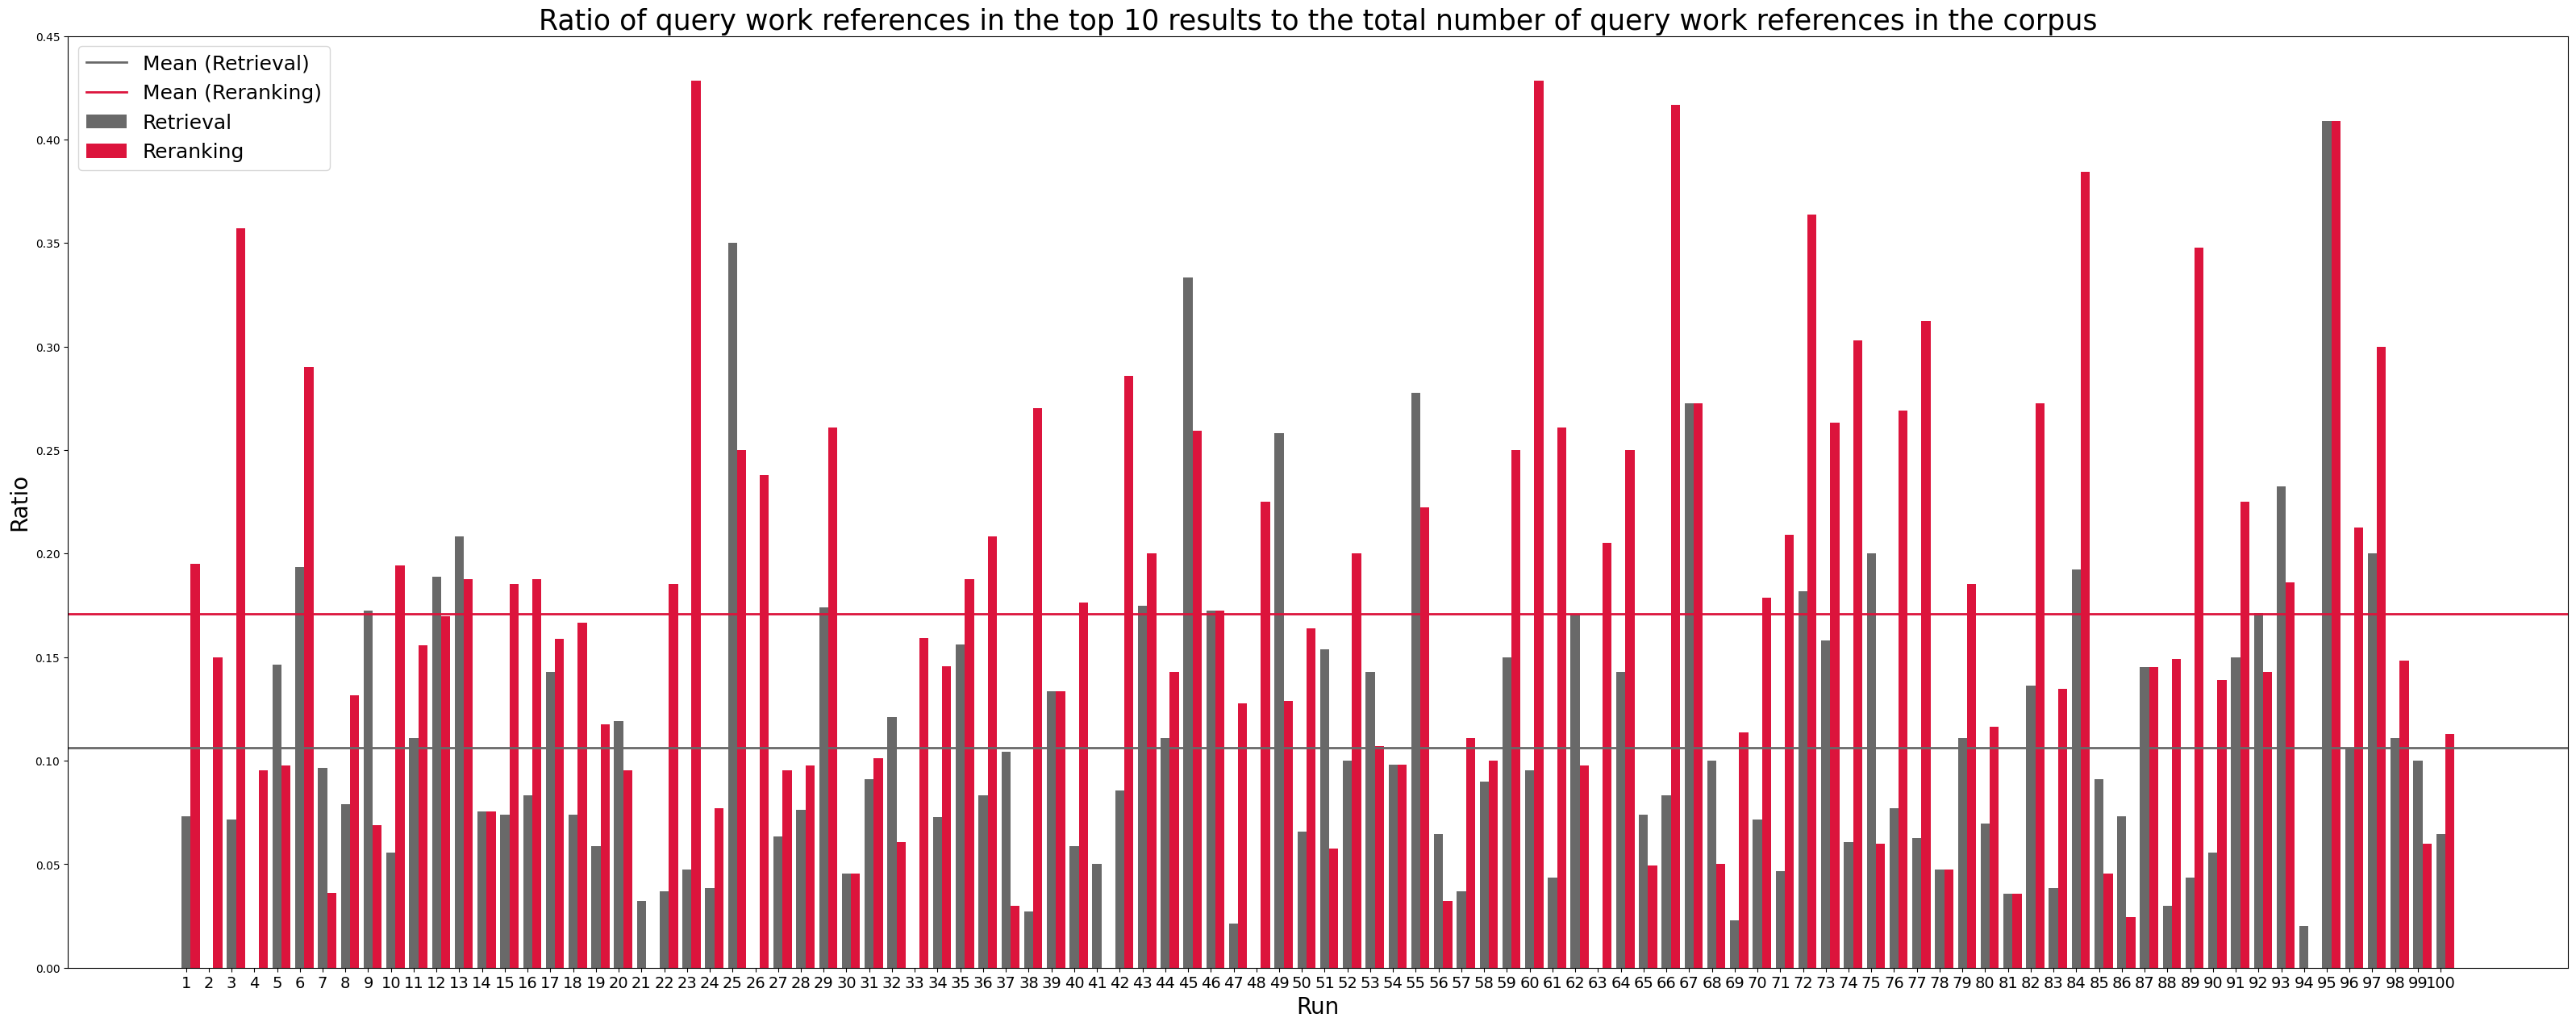

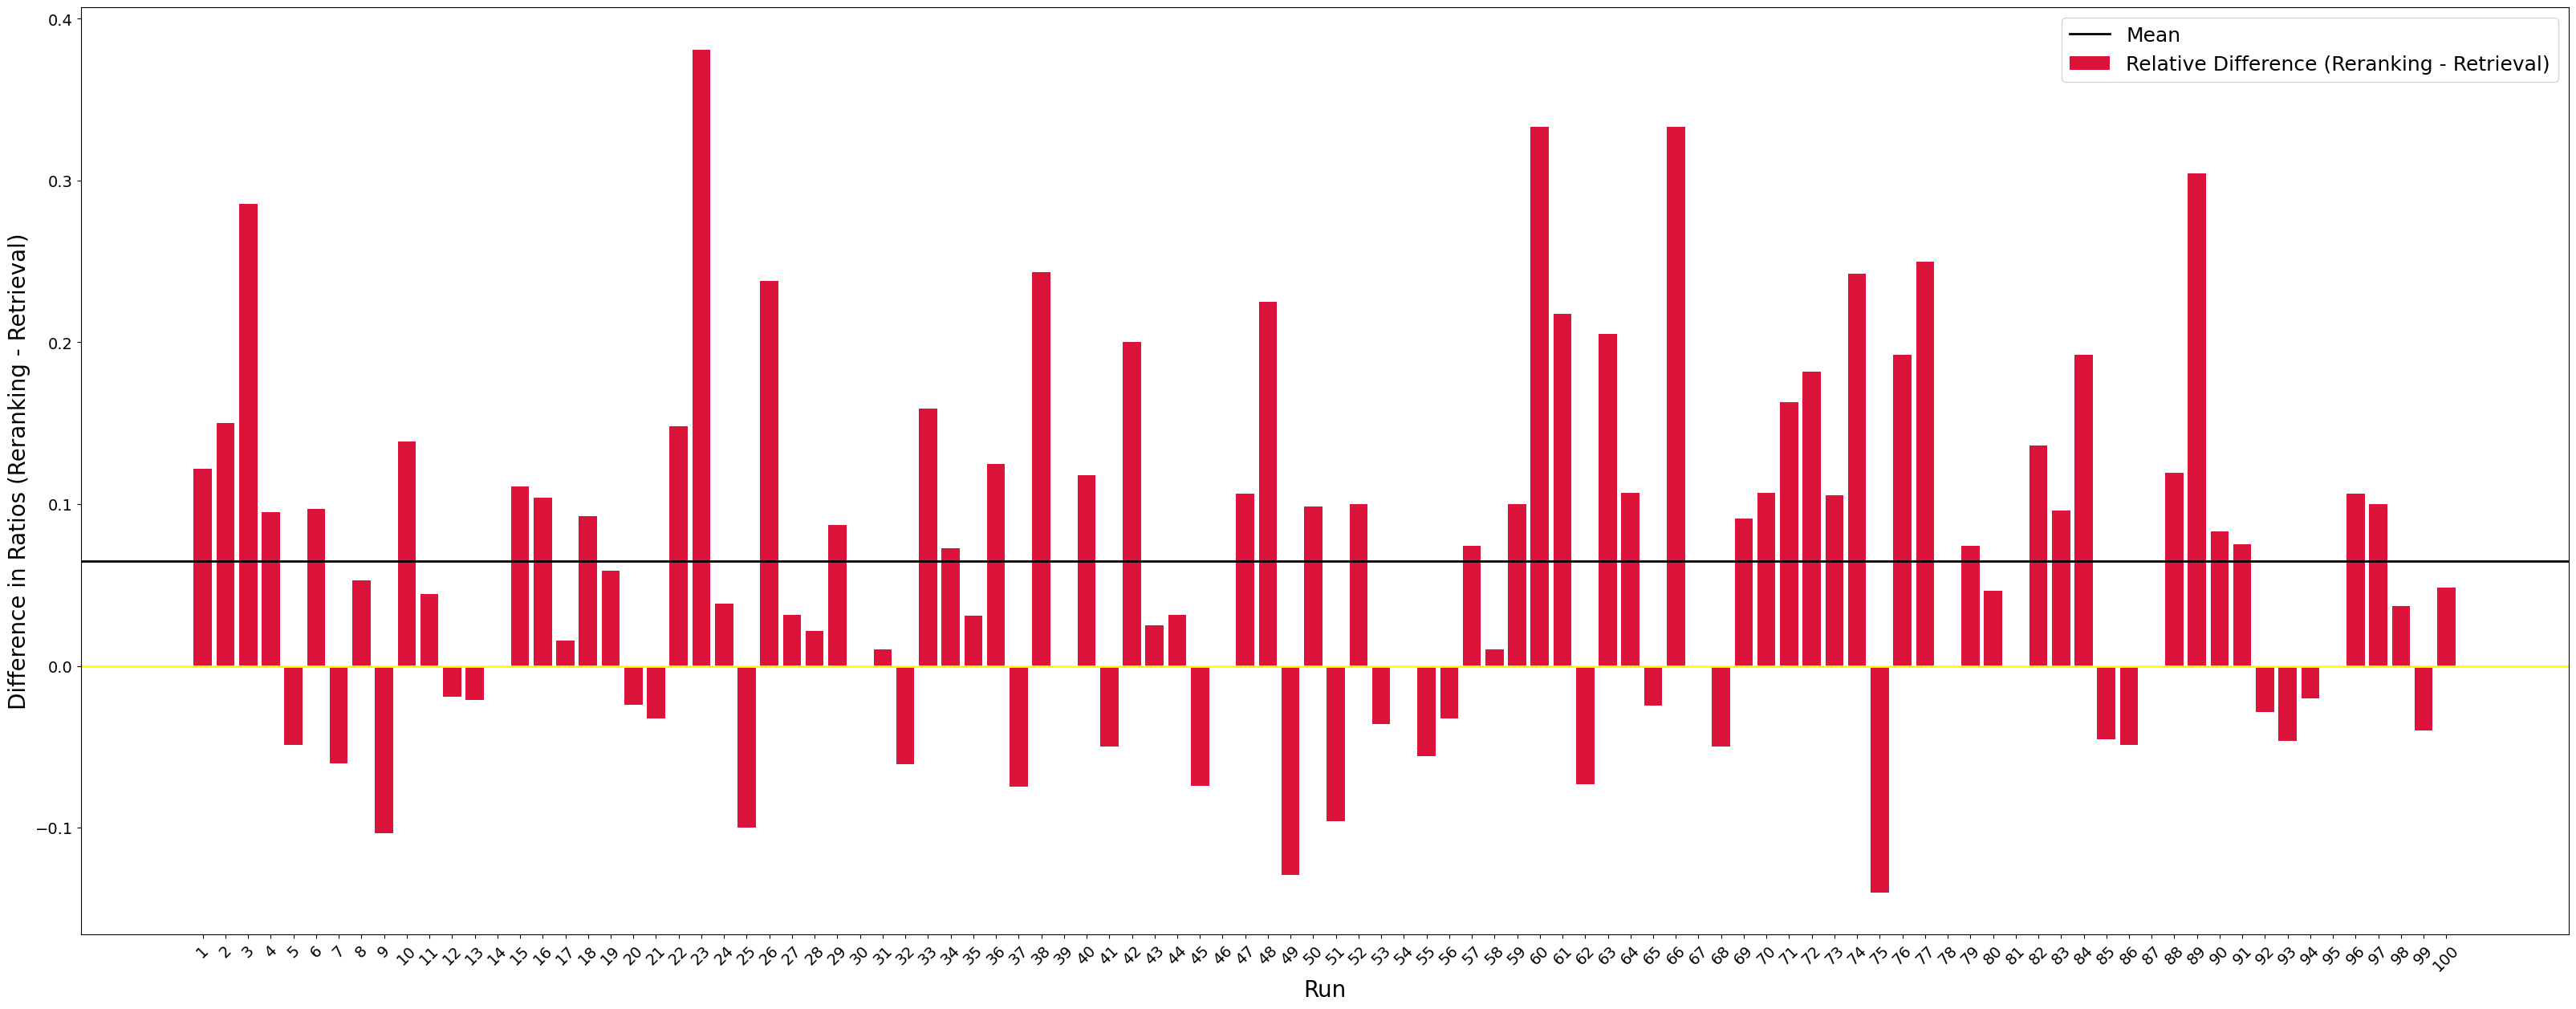

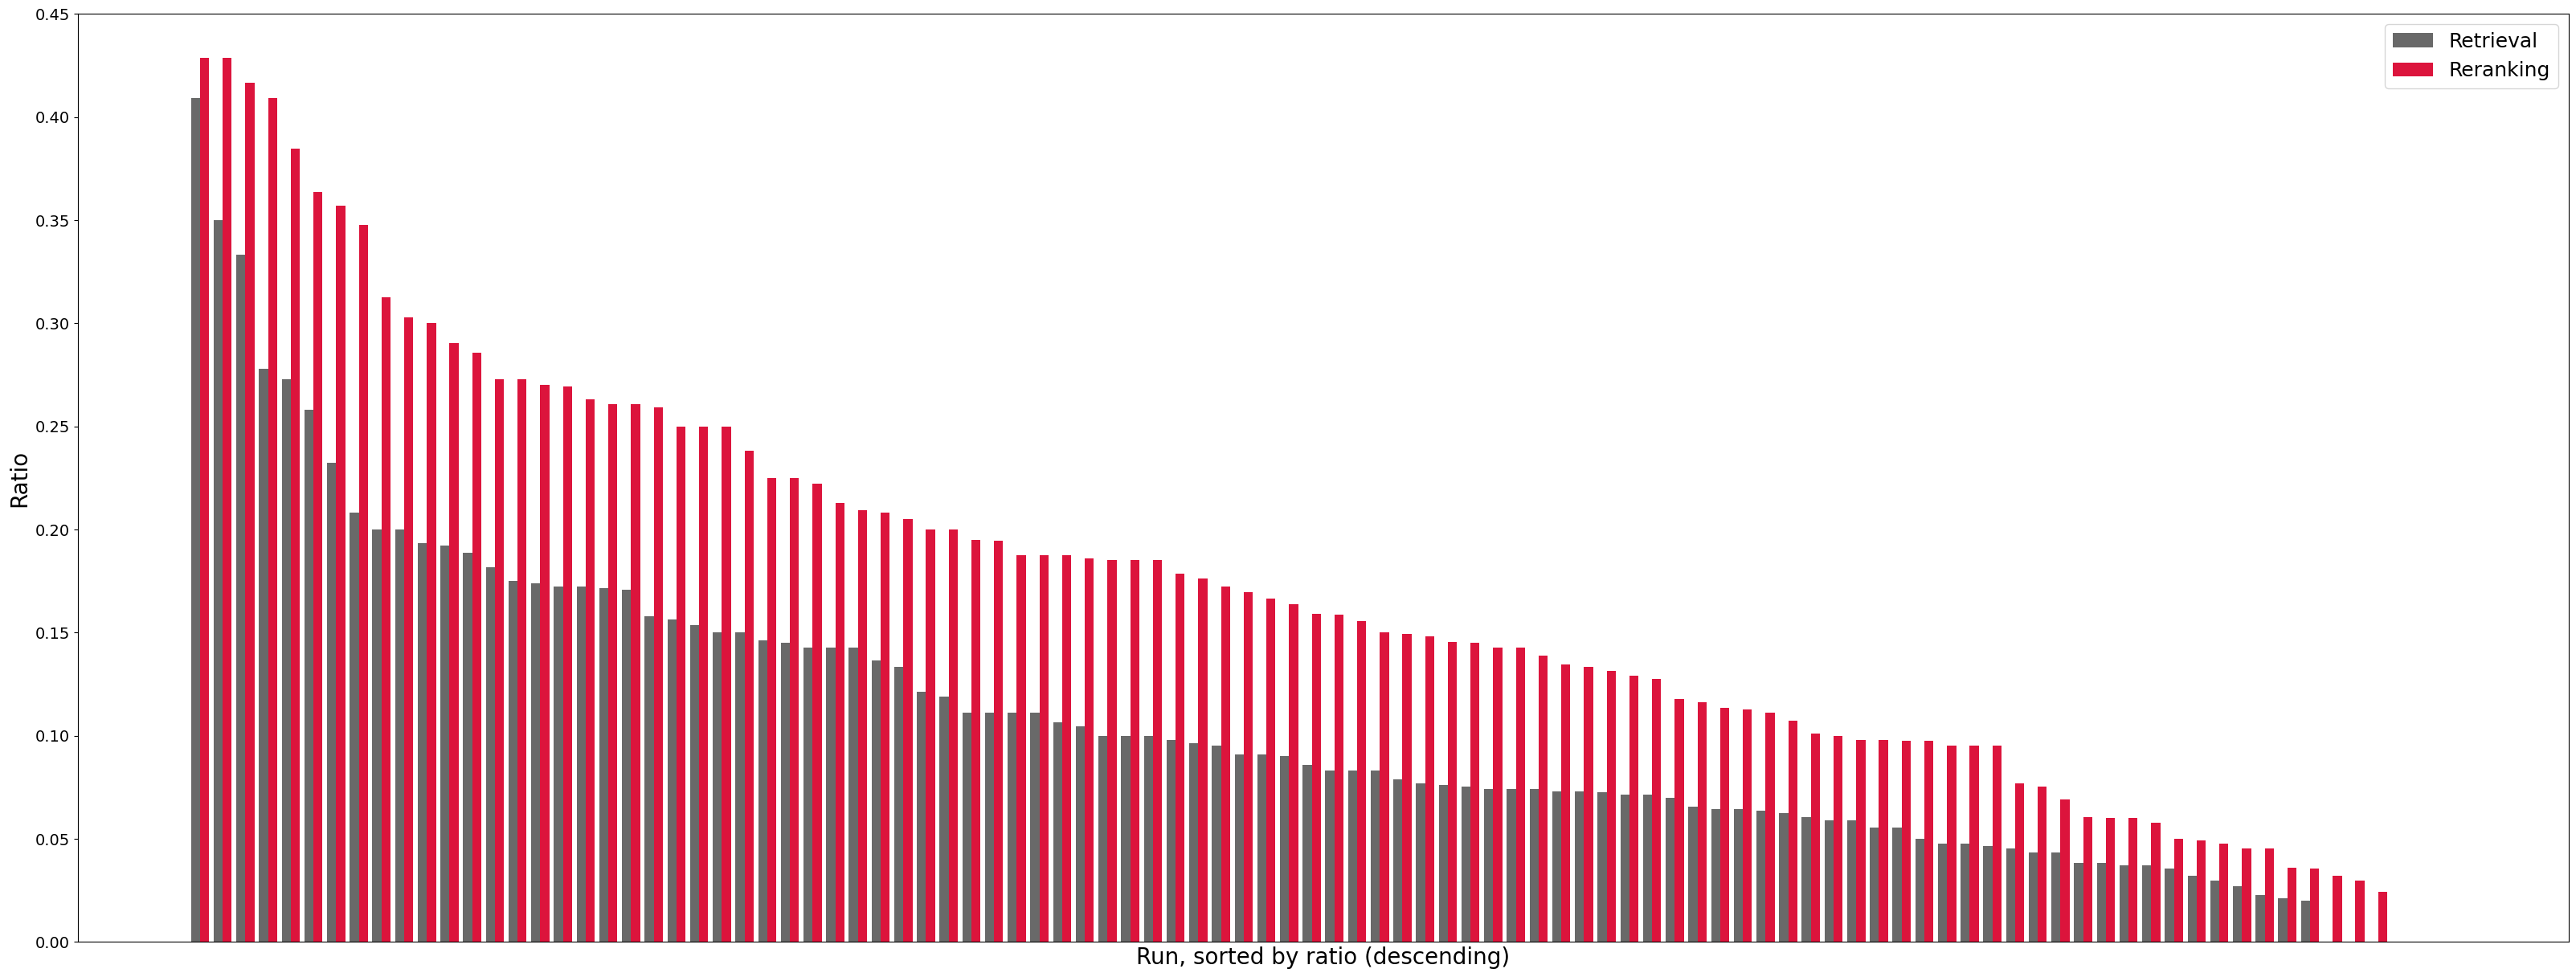

In [175]:
plot_comparison(ratio_retrieved_references_retrieval, ratio_retrieved_references_reranking, title="Ratio of query work references in the top 10 results to the total number of query work references in the corpus", xlabel="Run")

## ratio of common references between query work and each retrieved work
for each combination of query work and corresponding retrieved work, the ratio is computed as: common_references / max_possible_common_references \
where max_possible_common_references = min(query_references, retrieved_references), and common_references is the size of the intersection of the two sets

for a ratio of 1.0, all references of either query or retrieved work are also referenced by the other\
for a ratio of NaN, max_possible_common_references is 0, which means the retrieved work has no references

In [176]:
reranking_top10

,run,type,query_work,result_work,result_rank,common_references,max_common_references,ratio_common_references,is_reference_of_citing_work
100,0,reranking,https://openalex.org/W316998542,https://openalex.org/W2104830066,1,6,41,0.146341,True
101,0,reranking,https://openalex.org/W316998542,https://openalex.org/W2134582745,2,0,41,0.000000,True
102,0,reranking,https://openalex.org/W316998542,https://openalex.org/W2138807703,3,1,39,0.025641,True
103,0,reranking,https://openalex.org/W316998542,https://openalex.org/W1971636989,4,7,41,0.170732,True
104,0,reranking,https://openalex.org/W316998542,https://openalex.org/W2106515248,5,0,0,NaN,True
...,...,...,...,...,...,...,...,...,...
19905,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W3001288491,6,0,0,NaN,True
19906,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W4280565316,7,7,43,0.162791,False
19907,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W3214152447,8,0,0,NaN,True
19908,99,reranking,https://openalex.org/W4386898729,https://openalex.org/W3201110970,9,4,21,0.190476,True


In [177]:
def get_ratio_common_references(df: pd.DataFrame) -> NDArray[np.float64]:      
    ratio_common_references = []
    num_runs = df["run"].max()
    for i in range(num_runs + 1):
        run_results = df[df["run"] == i]
        # sort by rank
        run_results = run_results.sort_values(by="result_rank")
        ratios = run_results["ratio_common_references"].to_numpy()
        ratio_common_references.append(ratios)        
        
    return np.array(ratio_common_references)

def get_mean_ratio_common_references_per_run(ratio_common_references: NDArray[np.float64]) -> NDArray[np.float64]:
    return np.nanmean(ratio_common_references, axis=1)

def get_mean_ratio_common_references_per_rank(ratio_common_references: NDArray[np.float64]) -> NDArray[np.float64]:
    return np.nanmean(ratio_common_references, axis=0)

def get_mean_ratio_common_references_total(ratio_common_references: NDArray[np.float64]) -> NDArray[np.float64]:
    return np.nanmean(ratio_common_references)

def get_median_ratio_common_references_total(ratio_common_references: NDArray[np.float64]) -> NDArray[np.float64]:
    return np.nanmedian(ratio_common_references)

In [178]:
ratio_common_references_retrieval = get_ratio_common_references(retrieval_top10)
ratio_common_references_reranking = get_ratio_common_references(reranking_top10)
ratio_common_references_reranking

array([[0.14634146, 0.        , 0.02564103, 0.17073171,        nan,
        0.09756098, 0.14285714,        nan, 0.04878049, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ,        nan, 0.        , 0.        ],
       [0.13793103, 0.83333333,        nan, 0.5       , 0.12      ,
        0.34482759, 0.16666667, 0.5       , 0.125     , 0.27586207],
       [0.        , 0.        ,        nan, 0.07142857, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.17073171, 0.24390244, 0.15384615, 0.26829268, 0.12121212,
        0.09375   , 0.22727273, 0.52631579, 0.        , 0.04878049],
       [0.375     , 0.15625   , 0.8       , 0.15625   , 0.13043478,
        0.09375   , 0.21875   ,        nan, 0.        , 0.03571429],
       [       nan,        nan,        nan, 0.07142857,        nan,
        0.        , 0.        , 0.        , 0.        ,        nan],
       [0.07894737, 0.03571429, 0.       

### ratio of common references, per run
mean ratio of common references, per run (ignoring NaN values)

In [179]:
mean_ratio_common_references_per_run_reranking = get_mean_ratio_common_references_per_run(ratio_common_references_reranking)
mean_ratio_common_references_per_run_retrieval = get_mean_ratio_common_references_per_run(ratio_common_references_retrieval)
mean_ratio_common_references_per_run_reranking

array([0.0789891 , 0.        , 0.33373563, 0.00793651, 0.18541041,
       0.21846101, 0.01428571, 0.0409114 , 0.21034483, 0.01888889,
       0.07767135, 0.05315305, 0.16418996, 0.18377889, 0.07962963,
       0.10716384, 0.1645479 , 0.02595864, 0.0815159 , 0.00680272,
       0.        , 0.02566138, 0.06734694, 0.0252077 , 0.18474026,
       0.01587302, 0.03330905, 0.09184823, 0.06649068, 0.00454545,
       0.14133451, 0.04924242, 0.01262626, 0.01558442, 0.2226825 ,
       0.22250101, 0.10311198, 0.1405543 , 0.0158179 , 0.00909091,
       0.01040696, 0.14593285, 0.0902391 , 0.14929654, 0.2205621 ,
       0.04300957, 0.01434988, 0.0254058 , 0.18383752, 0.16499732,
       0.06296008, 0.09047619, 0.12916667, 0.03642602, 0.07965218,
       0.08709677, 0.08744856, 0.11333205, 0.03460275, 0.07804233,
       0.08009153, 0.0320122 , 0.03062678, 0.21092339, 0.30897412,
       0.17009804, 0.14560434, 0.19528953, 0.02067449, 0.34045409,
       0.09975369, 0.09372674, 0.1103387 , 0.08056926, 0.06617

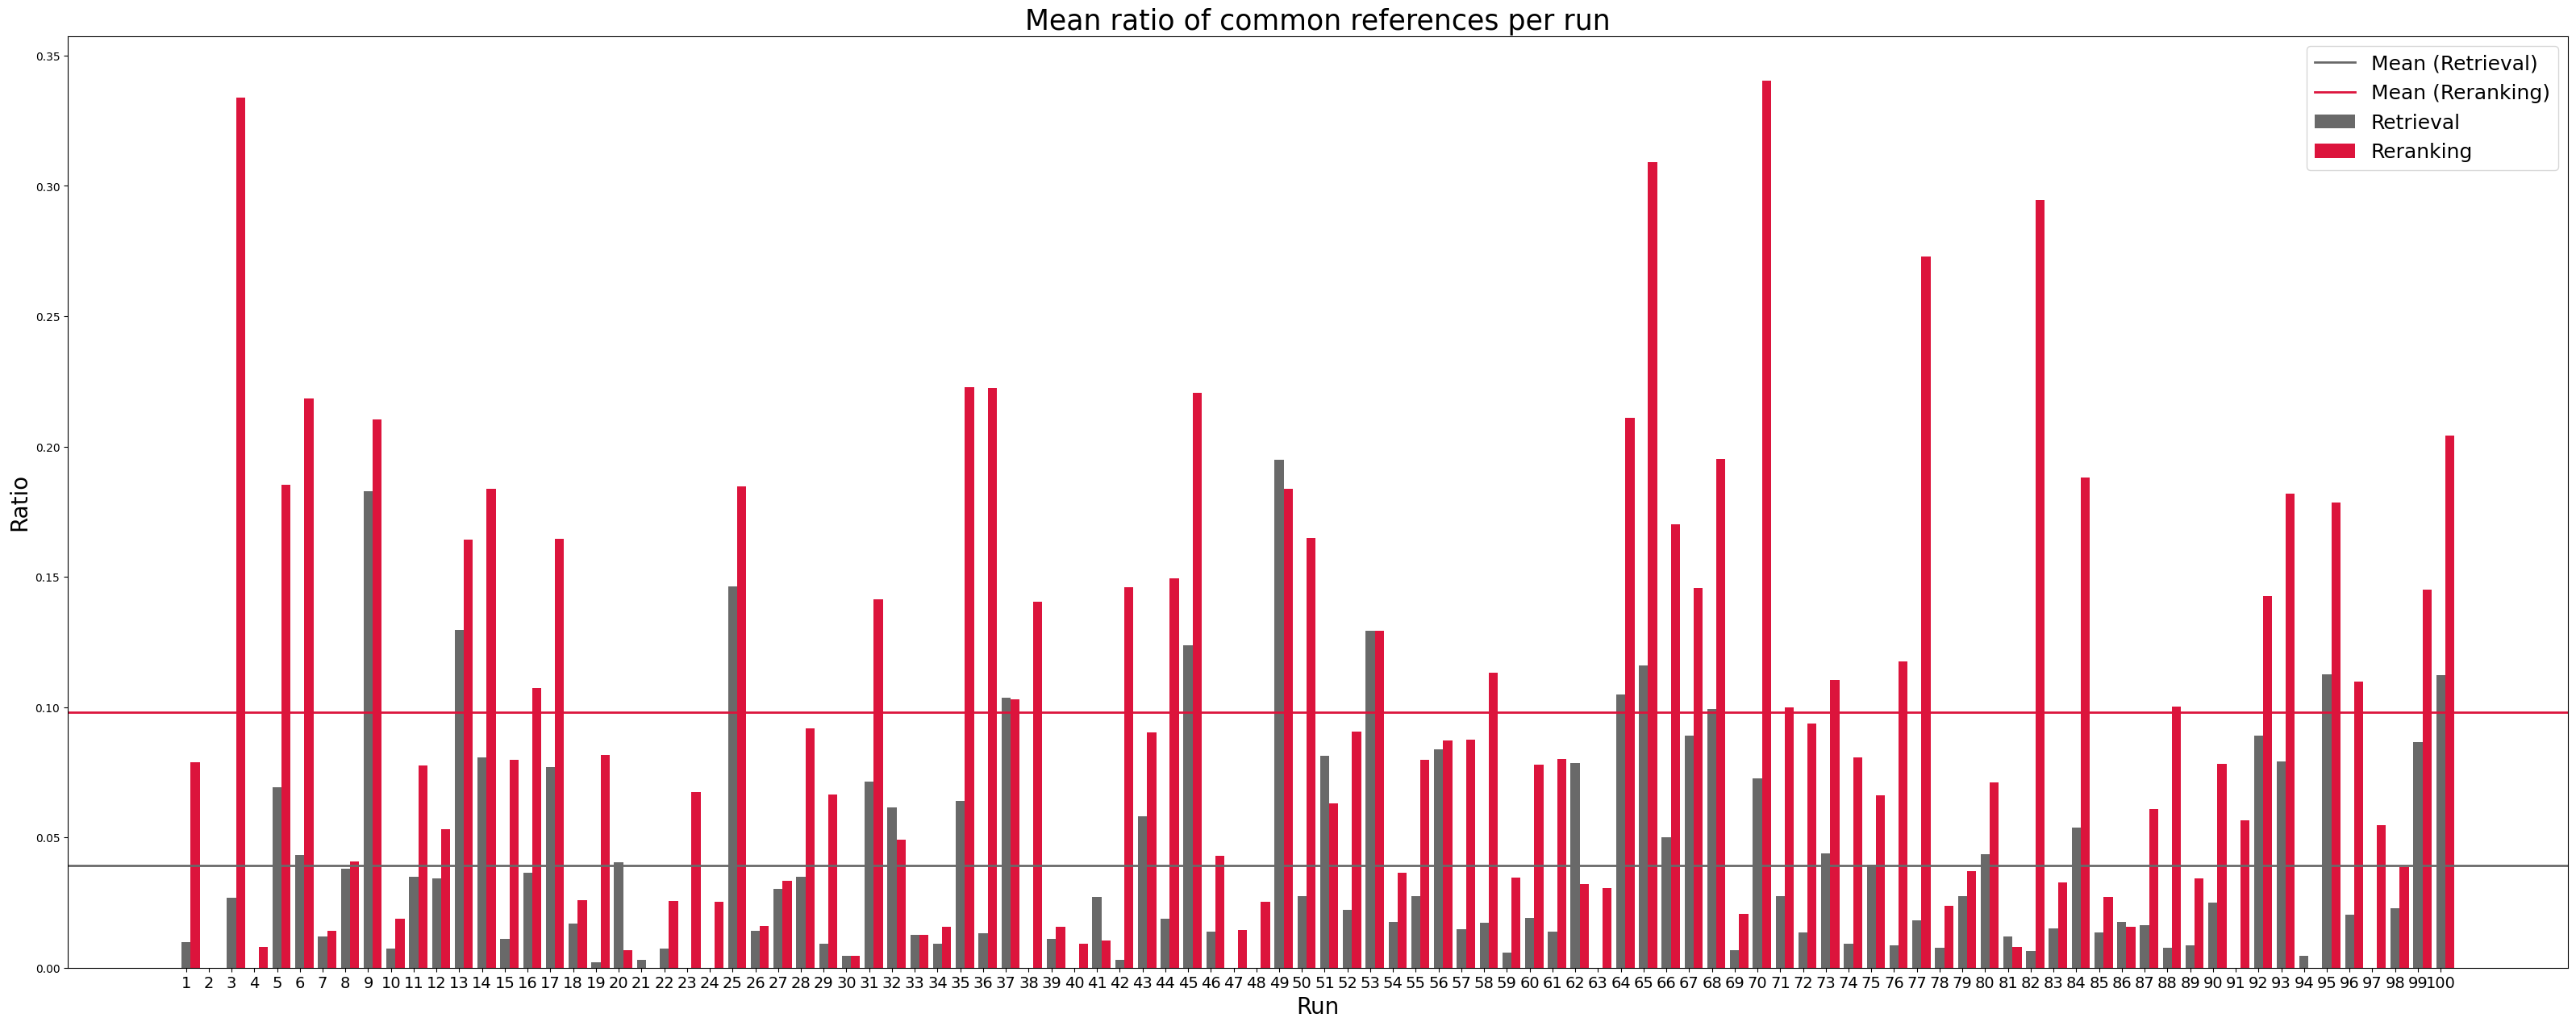

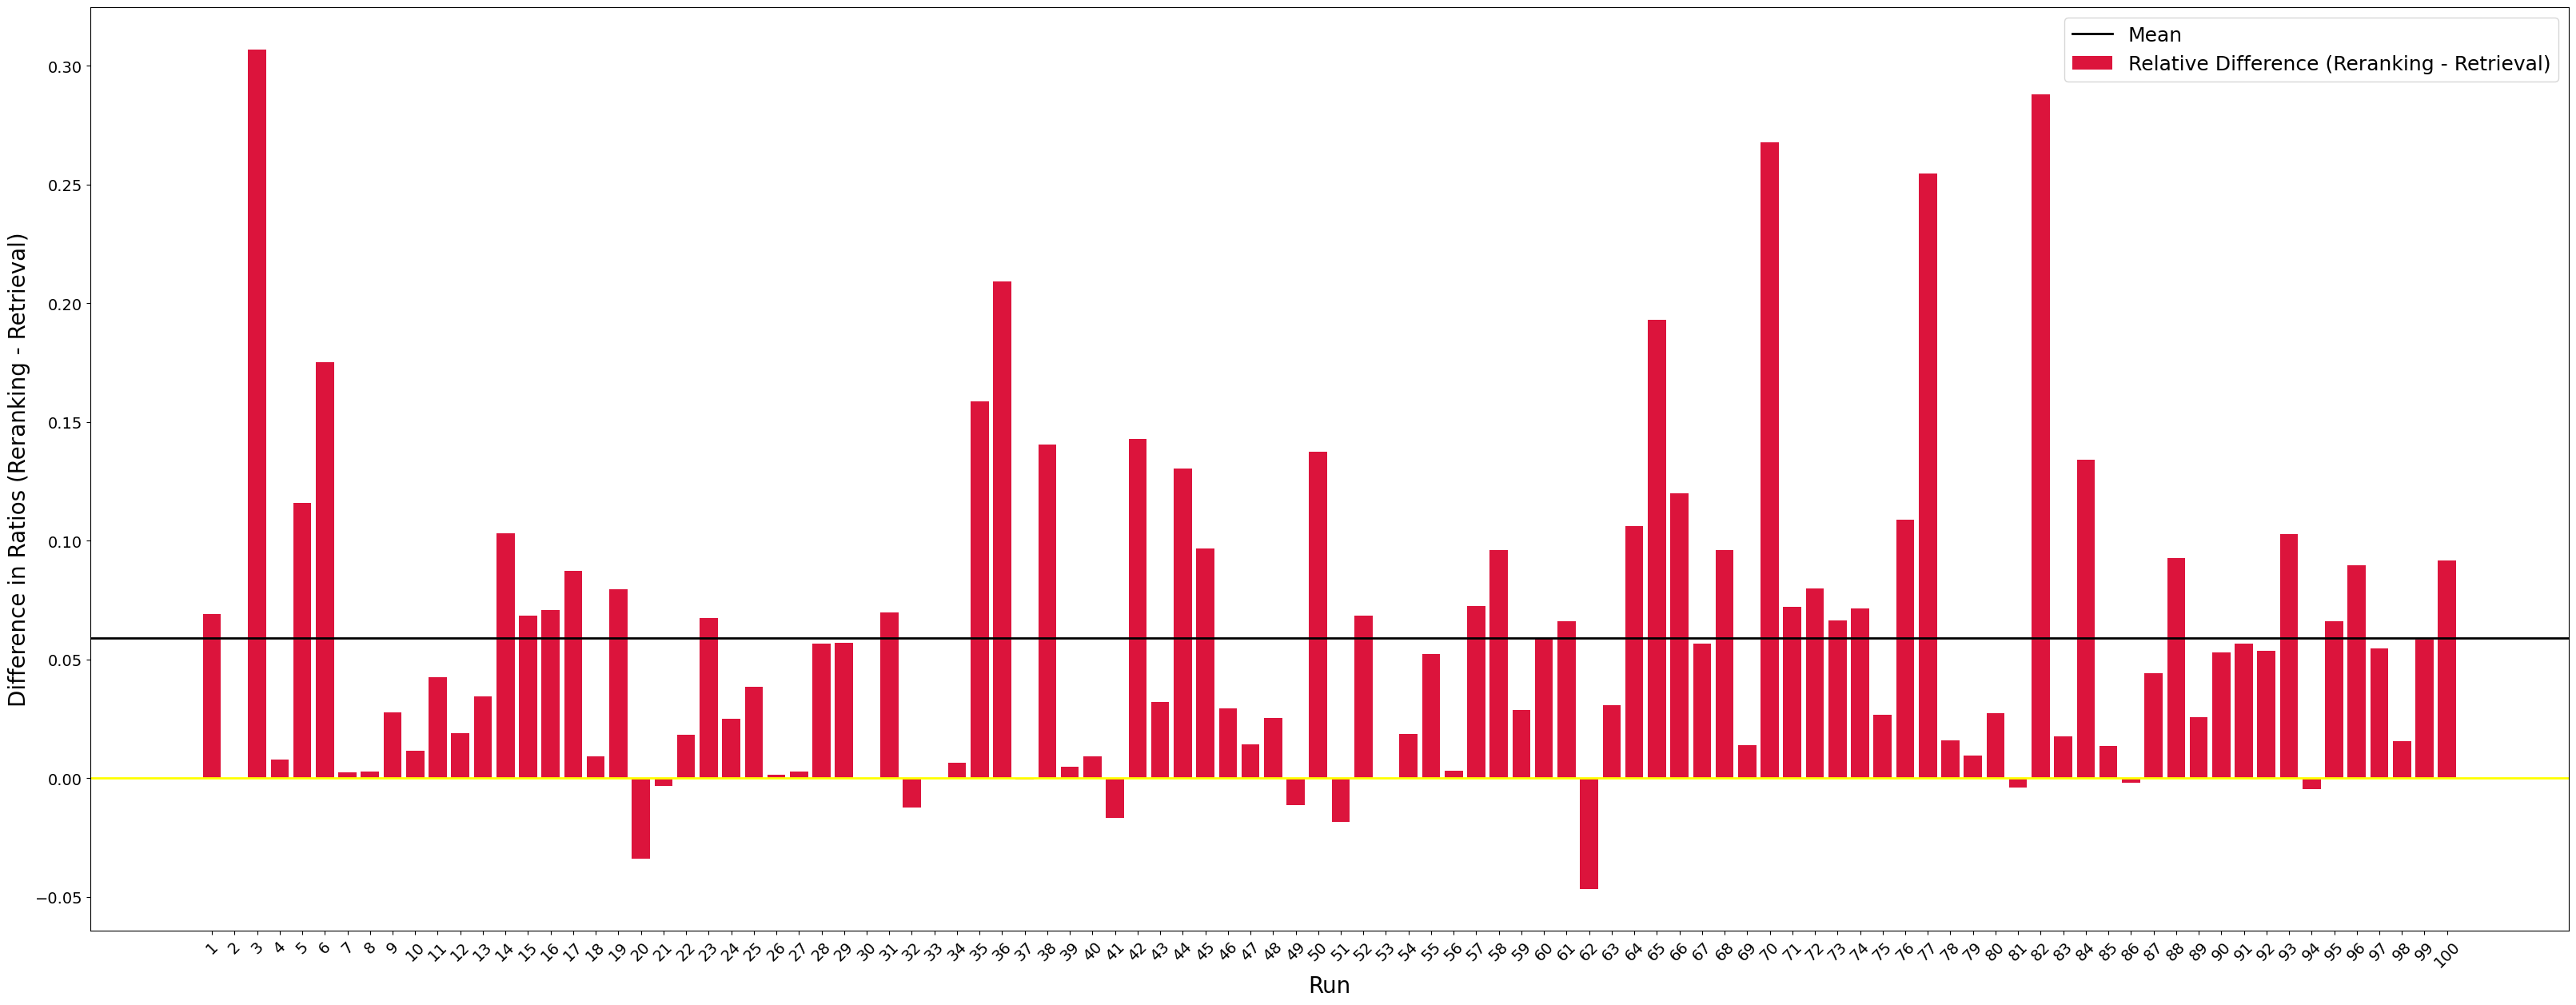

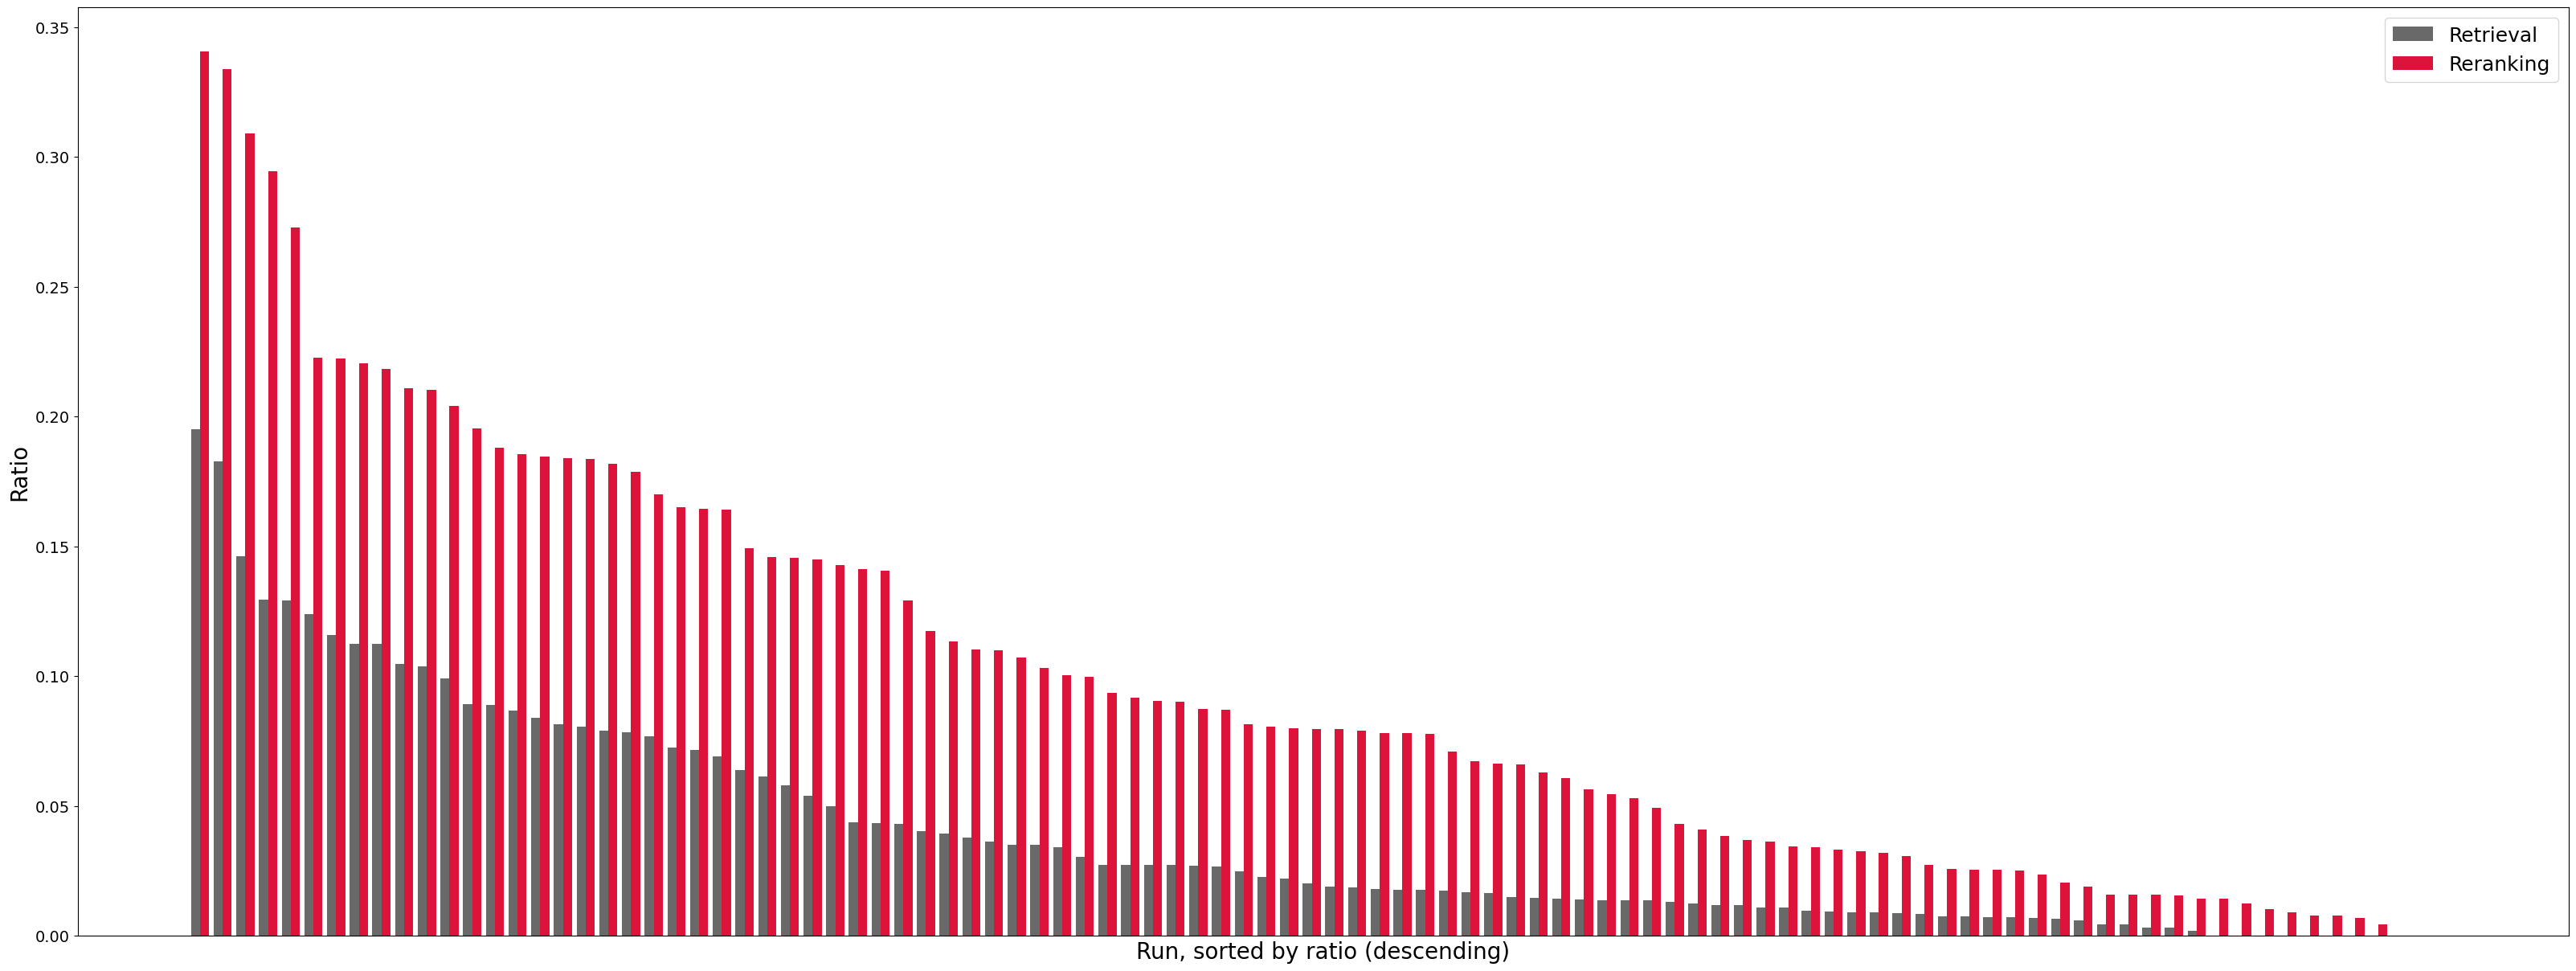

In [180]:
plot_comparison(mean_ratio_common_references_per_run_retrieval, mean_ratio_common_references_per_run_reranking, title="Mean ratio of common references per run", xlabel="Run")

### ratio of common references, per rank
mean ratio of common references, per rank (ignoring NaN values)
--> e.g. what is the mean ratio of common references for the top 1 retrieved work (across all runs)

In [181]:
mean_ratio_common_references_per_rank_retrieval = get_mean_ratio_common_references_per_rank(ratio_common_references_retrieval)
mean_ratio_common_references_per_rank_reranking = get_mean_ratio_common_references_per_rank(ratio_common_references_reranking)
mean_ratio_common_references_per_rank_retrieval, mean_ratio_common_references_per_rank_reranking

(array([0.03708939, 0.03395041, 0.04884873, 0.04698782, 0.03238772,
        0.04108161, 0.03383854, 0.04464056, 0.03224711, 0.04584298]),
 array([0.12350967, 0.12766741, 0.12055043, 0.09277569, 0.10178062,
        0.08824499, 0.10402249, 0.09075526, 0.0683477 , 0.07283911]))

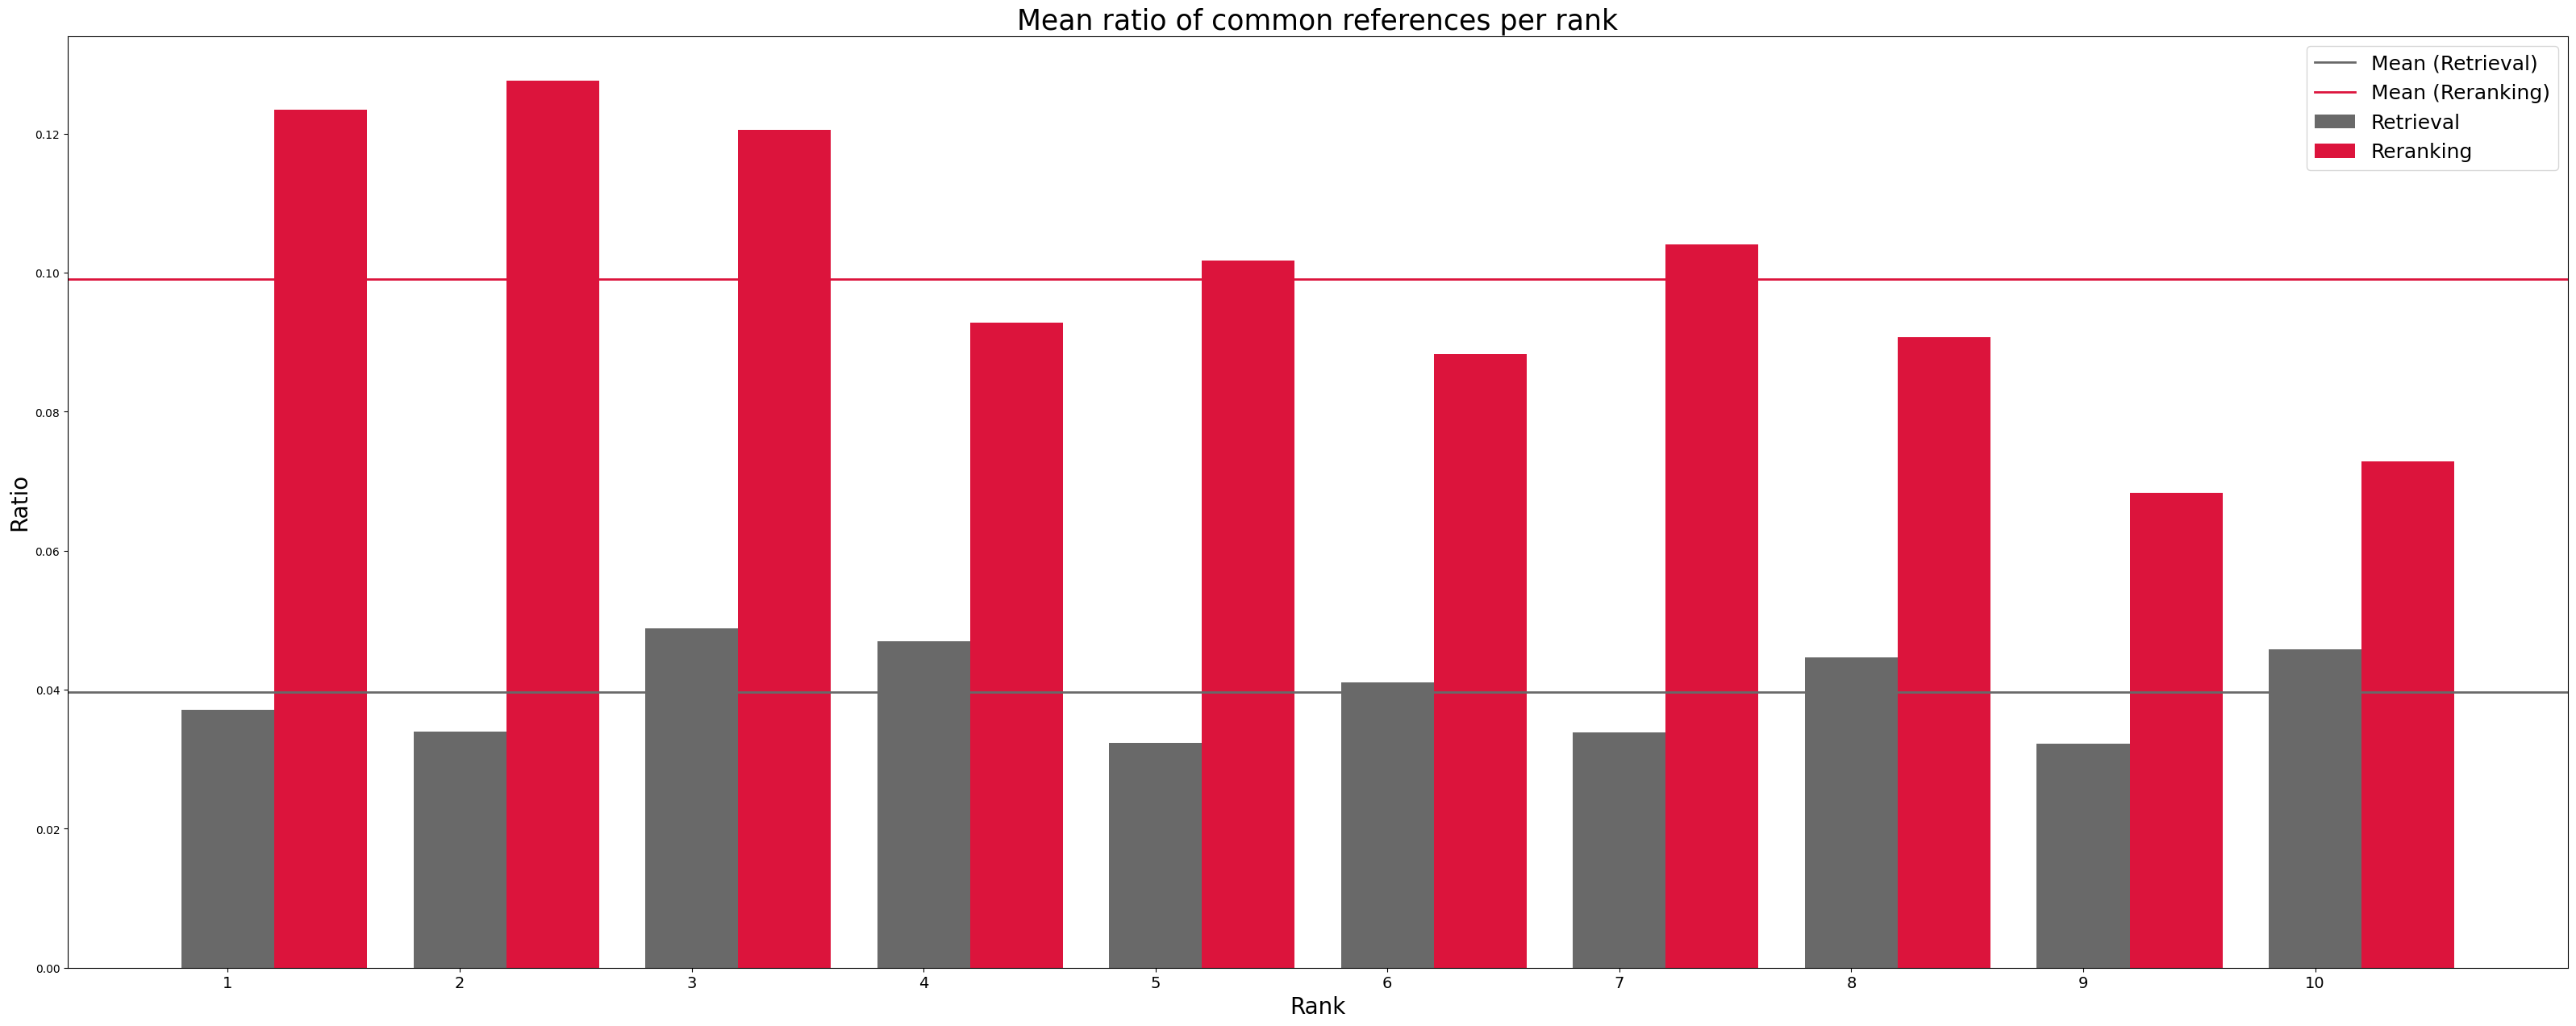

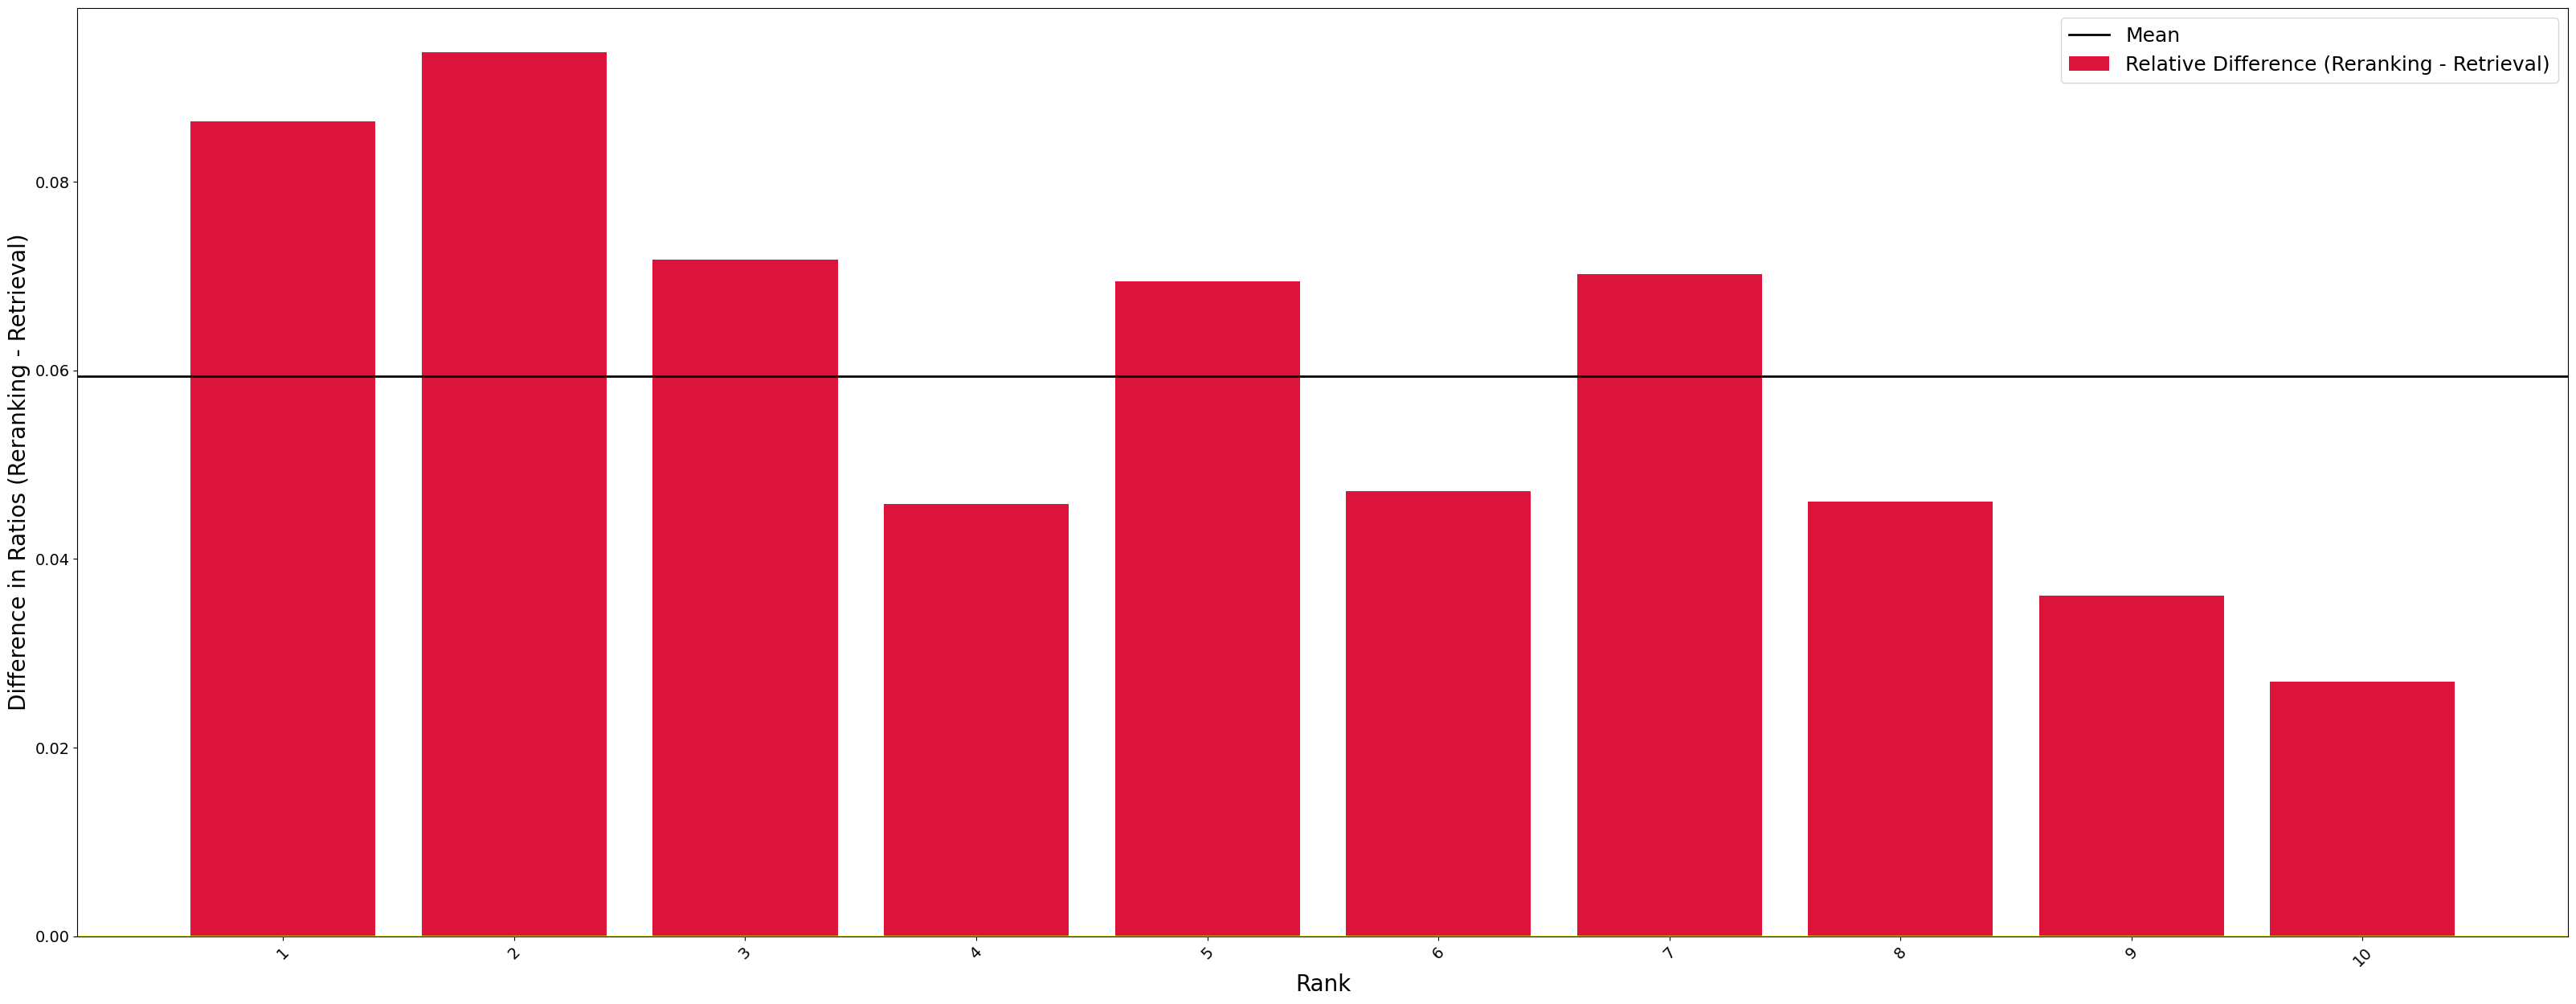

In [182]:
plot_comparison(mean_ratio_common_references_per_rank_retrieval, mean_ratio_common_references_per_rank_reranking, title="Mean ratio of common references per rank", xlabel="Rank")

## mean ratio of common references, total
mean across all runs and ranks

In [183]:
mean_ratio_common_references_total_reranking = get_mean_ratio_common_references_total(ratio_common_references_reranking)
mean_ratio_common_references_total_retrieval = get_mean_ratio_common_references_total(ratio_common_references_retrieval)
mean_ratio_common_references_total_retrieval, mean_ratio_common_references_total_reranking

(0.03970552015052711, 0.09889841796671463)

## median ratio of common references, total
median across all runs and ranks

In [184]:
median_ratio_common_references_total_reranking = get_median_ratio_common_references_total(ratio_common_references_reranking)
median_ratio_common_references_total_retrieval = get_median_ratio_common_references_total(ratio_common_references_retrieval)
median_ratio_common_references_total_retrieval, median_ratio_common_references_total_reranking

(0.0, 0.05064102564102564)